In [1]:
# Initial Imports
import pandas as pd
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
import time
from joblib import dump,load # Save Models
from numpy import random
import os
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt

# SDK Imports
import shrimpy

# Data Pre-Processing
1. API's
    - shrimpy
    - coinbase pro
    - kucoin
    - kraken
    - binance
2. Factors
    - EMA
    - RSI  
---

In [3]:
# Set environment variables from the .env file
env_path = Path("/Users/GrantDePalma")/'.env'
load_dotenv(env_path)
# Extract API Keys from environment variables
shrimpy_dev_public_key = os.getenv("SHRIMPY_DEV_PUBLIC_KEY")
shrimpy_dev_private_key = os.getenv("SHRIMPY_DEV_PRIVATE_KEY")
KUCOIN_API_KEY = os.getenv("KUCOIN_API_KEY")
KUCOIN_PRIVATE_KEY = os.getenv("KUCOIN_SECRET_KEY")
COINBASE_API_KEY = os.getenv("COINBASE_PRO_API_KEY")
COINBASE_PRIVATE_KEY = os.getenv("COINBASE_PRO_SECRET_KEY")

# Shrimpy API Client
shrimpy_client = shrimpy.ShrimpyApiClient(shrimpy_dev_public_key, shrimpy_dev_private_key)

In [6]:
def get_base_exchange_data(exchange):
    # Get Digital Asset Data
    def get_exchange_assets(exchange):
        exchange_assets = shrimpy_client.get_exchange_assets(exchange)
        exchange_assets_df = pd.DataFrame(columns=['id','name', 'symbol', 'trading_symbol'])
        for key, value in enumerate(exchange_assets):
            exchange_assets_df.loc[key] = [value['id'], value['name'], value['symbol'], value['tradingSymbol']]
        return exchange_assets_df

    def calc_trading_pairs_df(exchange):
        exchange_pairs = shrimpy_client.get_trading_pairs(exchange)
        exchange_pairs_df = pd.DataFrame(columns=['base','quote'])
        for key, value in enumerate(exchange_pairs):
            exchange_pairs_df.loc[key] = [value['baseTradingSymbol'],value['quoteTradingSymbol']]
        return exchange_pairs_df
    return get_exchange_assets(exchange), calc_trading_pairs_df(exchange)

In [11]:
df_kucoin_assets, df_kucoin_pairs = get_base_exchange_data('kucoin')

In [12]:
df_kucoin_assets

,id,name,symbol,trading_symbol
0,38,Bitcoin,BTC,BTC
1,153,Ethereum,ETH,ETH
2,372,Tether,USDT,USDT
3,267,NEO,NEO,NEO
4,396,VeChain,VET,VET
...,...,...,...,...
227,1114,USDJ,USDJ,USDJ
228,1109,Aleph.im,ALEPH,ALEPH
229,1115,SUN,SUN,SUN
230,1119,Uniswap,UNI,UNI


In [13]:
df_kucoin_pairs_btc = df_kucoin_pairs[df_kucoin_pairs['quote']=='BTC']
df_kucoin_pairs_btc

,base,quote
1,REQ,BTC
3,NULS,BTC
4,CVC,BTC
5,NEBL,BTC
7,SNT,BTC
...,...,...
468,FTM,BTC
476,VSYS,BTC
478,BTT,BTC
480,SOLVE,BTC


In [15]:
df_candles_kucoin_btcusd_6h_ = shrimpy_client.get_candles('kucoin', 'BTC', 'USDT', '6h', '2020-01-01')
df_candles_kucoin_btcusd_6h_

[{'open': '8704.6000000000000000',
  'high': '8741.3000000000000000',
  'low': '8629.9000000000000000',
  'close': '8675.5000000000000000',
  'volume': '276.6920548800000000',
  'quoteVolume': 2398832.2482015346,
  'btcVolume': 276.59269596725477,
  'usdVolume': 2398832.2482015346,
  'time': '2020-01-20T00:00:00.000Z'},
 {'open': '8675.7000000000000000',
  'high': '8693.0000000000000000',
  'low': '8600.0000000000000000',
  'close': '8616.9000000000000000',
  'volume': '154.1610349300000000',
  'quoteVolume': 1334287.505439972,
  'btcVolume': 154.14031523405598,
  'usdVolume': 1334287.505439972,
  'time': '2020-01-20T06:00:00.000Z'},
 {'open': '8616.8000000000000000',
  'high': '8703.2000000000000000',
  'low': '8529.2000000000000000',
  'close': '8645.5000000000000000',
  'volume': '304.4489461600000000',
  'quoteVolume': 2624769.920734472,
  'btcVolume': 304.4442310709158,
  'usdVolume': 2624769.920734472,
  'time': '2020-01-20T12:00:00.000Z'},
 {'open': '8645.6000000000000000',
  'h

In [16]:
shrimpy_client.get_candles('kraken', 'XBT', 'USD', '6h', '2014-01-01')


[{'open': '8705.8000000000000000',
  'high': '8726.0000000000000000',
  'low': '8621.9000000000000000',
  'close': '8659.7000000000000000',
  'volume': '576.5348781700000000',
  'quoteVolume': 4994087.3527871715,
  'btcVolume': 576.3747022871698,
  'usdVolume': 4994087.3527871715,
  'time': '2020-01-20T00:00:00.000Z'},
 {'open': '8659.7000000000000000',
  'high': '8673.7000000000000000',
  'low': '8582.8000000000000000',
  'close': '8602.3000000000000000',
  'volume': '549.1769907200000000',
  'quoteVolume': 4742942.126111836,
  'btcVolume': 548.9013333796659,
  'usdVolume': 4742942.126111836,
  'time': '2020-01-20T06:00:00.000Z'},
 {'open': '8603.6000000000000000',
  'high': '8687.9000000000000000',
  'low': '8510.0000000000000000',
  'close': '8627.1000000000000000',
  'volume': '1728.7177852900000000',
  'quoteVolume': 14884596.196765017,
  'btcVolume': 1728.5566024144846,
  'usdVolume': 14884596.196765017,
  'time': '2020-01-20T12:00:00.000Z'},
 {'open': '8627.1000000000000000',
  

In [ ]:
def get_prices(exchange, trading_pairs_df, interval, start):
    master_prices_df = pd.DataFrame()
    for index, row in trading_pairs_df.iterrows():
        candles = shrimpy_client.get_candles(exchange, row['base'], row['quote'], interval, start)
        time = []
        prices = []
        for key, value in enumerate(candles):
            time.append(value['time'])
            prices.append(value['close'])
        prices_df = pd.DataFrame(list(zip(time, prices)), columns = ['time', row['base'] + "_" + row['quote']])
        prices_df['time'] = pd.to_datetime(prices_df['time'])
        if master_prices_df.empty:
            master_prices_df = prices_df
        else:
            master_prices_df = pd.merge(master_prices_df, prices_df, left_on='time', right_on = 'time', how = 'left')
    return master_prices_df

In [38]:
## DO NOT RUN. WILL EAT UP ALL OUR DATA CREDITS
def get_exchange_data(exchange, interval, start):
    # Get Digital Asset Data
    def get_exchange_assets(exchange):
        exchange_assets = shrimpy_client.get_exchange_assets(exchange)
        exchange_assets_df = pd.DataFrame(columns=['id','name', 'symbol', 'trading_symbol'])
        for key, value in enumerate(exchange_assets):
            exchange_assets_df.loc[key] = [value['id'], value['name'], value['symbol'], value['tradingSymbol']]
        return exchange_assets_df

    def calc_trading_pairs_df(exchange):
        exchange_pairs = shrimpy_client.get_trading_pairs(exchange)
        exchange_pairs_df = pd.DataFrame(columns=['base','quote'])
        for key, value in enumerate(exchange_pairs):
            exchange_pairs_df.loc[key] = [value['baseTradingSymbol'],value['quoteTradingSymbol']]
        return exchange_pairs_df

    def get_prices(exchange, interval, start):
        trading_pairs_df = calc_trading_pairs_df(exchange)
        master_prices_df = pd.DataFrame()
        for index, row in trading_pairs_df.iterrows():
            candles = shrimpy_client.get_candles(exchange, row['base'], row['quote'], interval, start)
            time = []
            prices = []
            for key, value in enumerate(candles):
                time.append(value['time'])
                prices.append(value['close'])
            prices_df = pd.DataFrame(list(zip(time, prices)), columns = ['time', row['base'] + "_" + row['quote']])
            prices_df['time'] = pd.to_datetime(prices_df['time'])
            if master_prices_df.empty:
                master_prices_df = prices_df
            else:
                master_prices_df = pd.merge(master_prices_df, prices_df, left_on='time', right_on = 'time', how = 'left')
        return master_prices_df
    return get_exchange_assets(exchange), calc_trading_pairs_df(exchange), get_prices(exchange, interval, start)


In [20]:
get_prices('kucoin', '1h', '2020-01-01')

,time,REQ_ETH,REQ_BTC,NULS_ETH,NULS_BTC,CVC_BTC,NEBL_BTC,SNT_ETH,SNT_BTC,PPT_ETH,...,FTM_ETH,GO_KCS,VSYS_BTC,MKR_DAI,BTT_BTC,BTT_ETH,SOLVE_BTC,GRIN_BTC,GRIN_ETH,GRIN_USDT
0,2020-07-16 06:00:00+00:00,0.0001750000000000,0.0000045000000000,0.0019913000000000,0.0000509100000000,0.0000031000000000,0.0000640000000000,0.0001084000000000,0.0000027700000000,NaN,...,0.0000444000000000,0.0152040000000000,0.0000030400000000,446.5000000000000000,0.0000000432000000,0.0000016900000000,0.0000142400000000,0.0000481600000000,0.0018796000000000,0.4394790000000000
1,2020-07-16 07:00:00+00:00,0.0001680000000000,0.0000043400000000,0.0018920000000000,0.0000484800000000,0.0000030000000000,0.0000630000000000,0.0001086000000000,0.0000027700000000,NaN,...,0.0000437000000000,0.0150082000000000,0.0000029900000000,442.4000000000000000,0.0000000421000000,0.0000016500000000,0.0000142100000000,0.0000476600000000,0.0018653000000000,0.4300680000000000
2,2020-07-16 08:00:00+00:00,0.0001712000000000,0.0000043800000000,NaN,0.0000487900000000,0.0000030200000000,0.0000625100000000,0.0001076000000000,0.0000027500000000,NaN,...,0.0000428000000000,0.0151896000000000,0.0000029600000000,439.6600000000000000,0.0000000421000000,0.0000016400000000,0.0000142000000000,0.0000471200000000,0.0018484000000000,0.4298890000000000
3,2020-07-16 10:00:00+00:00,0.0001704000000000,0.0000043700000000,0.0019000000000000,0.0000485700000000,0.0000029300000000,0.0000617100000000,NaN,0.0000027300000000,NaN,...,0.0000422000000000,0.0148943000000000,0.0000029600000000,432.7600000000000000,0.0000000410000000,0.0000016000000000,0.0000139000000000,0.0000475300000000,0.0018574000000000,0.4305840000000000
4,2020-07-16 11:00:00+00:00,0.0001740000000000,0.0000044400000000,0.0018911000000000,0.0000482400000000,0.0000029700000000,0.0000617100000000,0.0001080000000000,0.0000027600000000,NaN,...,0.0000429000000000,0.0149183000000000,0.0000029800000000,440.8100000000000000,0.0000000410000000,0.0000016100000000,0.0000138900000000,0.0000471100000000,0.0018463000000000,0.4290570000000000
5,2020-07-16 13:00:00+00:00,0.0001748000000000,0.0000044800000000,0.0018799000000000,0.0000480400000000,0.0000029600000000,0.0000623800000000,NaN,0.0000027900000000,NaN,...,0.0000436000000000,0.0159372000000000,0.0000029500000000,438.7700000000000000,0.0000000412000000,0.0000016100000000,0.0000138400000000,0.0000468600000000,0.0018352000000000,0.4263100000000000
6,2020-07-16 14:00:00+00:00,0.0001730000000000,0.0000044000000000,0.0018802000000000,0.0000481400000000,0.0000029500000000,0.0000617200000000,NaN,0.0000027900000000,NaN,...,0.0000436000000000,0.0158998000000000,0.0000029700000000,437.0000000000000000,0.0000000412000000,0.0000016100000000,0.0000138300000000,0.0000476600000000,0.0018653000000000,0.4342720000000000
7,2020-07-16 16:00:00+00:00,0.0001730000000000,0.0000044300000000,NaN,0.0000486500000000,0.0000029900000000,0.0000625100000000,0.0001082000000000,0.0000027800000000,NaN,...,0.0000439000000000,0.0159188000000000,0.0000030000000000,436.2300000000000000,0.0000000420000000,0.0000016400000000,0.0000136700000000,0.0000478700000000,0.0018750000000000,0.4379860000000000
8,2020-07-16 17:00:00+00:00,0.0001730000000000,0.0000044300000000,0.0019138000000000,0.0000488100000000,0.0000029700000000,0.0000621200000000,NaN,0.0000027700000000,0.0014229000000000,...,0.0000433000000000,0.0158805000000000,0.0000030300000000,435.1000000000000000,0.0000000422000000,0.0000016400000000,0.0000138600000000,0.0000476500000000,0.0018648000000000,NaN
9,2020-07-16 18:00:00+00:00,0.0001712000000000,0.0000043900000000,NaN,0.0000488600000000,0.0000029800000000,0.0000628800000000,0.0001072000000000,0.0000027500000000,NaN,...,0.0000433000000000,0.0159665000000000,0.0000030200000000,438.7600000000000000,0.0000000413000000,0.0000016200000000,0.0000136900000000,0.0000469400000000,0.0018426000000000,0.4300060000000000


In [39]:
kucoin_assets, kucoin_piars, kucoin_prices_1h = get_exchange_data('kucoin', '1h', '2020-01-01')

In [ ]:
kucoin_assets.shape

In [31]:
kraken_assets, kraken_piars, kraken_prices_1h = get_exchange_data('kraken', '1h', '2020-01-01')
kraken_prices_1h.set_index('time', inplace=True)

In [40]:
kraken_prices_1h

,ADA_ETH,ADA_EUR,ADA_USD,ADA_XBT,ALGO_ETH,ALGO_EUR,ALGO_USD,ALGO_XBT,ATOM_ETH,ATOM_EUR,...,XRP_EUR,XRP_JPY,XRP_USD,ZEC_XBT,ZEC_EUR,ZEC_USD,EUR_USD,GBP_USD,USD_CAD,USD_JPY
time,,,,,,,,,,,,,,,,,,,,,
2020-07-16 08:00:00+00:00,0.0005350000000000,0.1094570000000000,0.1243480000000000,0.0000136500000000,0.0011958000000000,0.2430000000000000,0.2778300000000000,0.0000306600000000,0.0167290000000000,3.4004000000000000,...,0.1685100000000000,NaN,0.1915600000000000,0.0064200000000000,51.5290000000000000,58.7300000000000000,1.1377700000000000,1.2504600000000000,NaN,NaN
2020-07-16 09:00:00+00:00,0.0005151000000000,0.1052350000000000,0.1194490000000000,0.0000131800000000,0.0011673000000000,0.2361800000000000,0.2693800000000000,0.0000297300000000,0.0165430000000000,3.3696000000000000,...,0.1669500000000000,NaN,0.1895600000000000,0.0063600000000000,50.4990000000000000,57.7400000000000000,1.1360100000000000,1.2492100000000000,NaN,NaN
2020-07-16 10:00:00+00:00,0.0005293000000000,0.1081850000000000,0.1226110000000000,0.0000135000000000,0.0011849000000000,0.2419200000000000,0.2750500000000000,0.0000303000000000,0.0165720000000000,3.3728000000000000,...,0.1675900000000000,NaN,0.1903600000000000,0.0064000000000000,51.2570000000000000,58.2900000000000000,1.1366000000000000,1.2479900000000000,1.3540300000000000,NaN
2020-07-16 11:00:00+00:00,0.0005294000000000,0.1077230000000000,0.1225500000000000,0.0000135000000000,0.0011874000000000,0.2409700000000000,0.2745000000000000,0.0000302900000000,0.0164910000000000,3.3488000000000000,...,0.1668900000000000,NaN,0.1900000000000000,0.0064100000000000,51.1120000000000000,57.9200000000000000,1.1382100000000000,1.2508400000000000,1.3552700000000000,NaN
2020-07-16 12:00:00+00:00,0.0005360000000000,0.1087300000000000,0.1237810000000000,0.0000136700000000,0.0011873000000000,0.2415000000000000,0.2765500000000000,0.0000303400000000,0.0164170000000000,3.3504000000000000,...,0.1668100000000000,NaN,0.1900100000000000,0.0064000000000000,50.9770000000000000,58.1100000000000000,1.1392600000000000,1.2525400000000000,1.3567600000000000,NaN
2020-07-16 13:00:00+00:00,0.0005317000000000,0.1085200000000000,0.1237060000000000,0.0000136200000000,0.0011841000000000,0.2390300000000000,0.2741800000000000,0.0000302600000000,0.0163730000000000,3.3337000000000000,...,0.1673600000000000,NaN,0.1907700000000000,0.0064000000000000,51.0700000000000000,58.2300000000000000,1.1396600000000000,1.2545300000000000,1.3547500000000000,NaN
2020-07-16 14:00:00+00:00,0.0005346000000000,0.1090480000000000,0.1244500000000000,0.0000136400000000,0.0011746000000000,0.2414700000000000,0.2729000000000000,0.0000303700000000,0.0165420000000000,3.3996000000000000,...,0.1682900000000000,NaN,0.1918600000000000,0.0064700000000000,51.6790000000000000,59.0800000000000000,1.1406700000000000,1.2553400000000000,1.3523000000000000,NaN
2020-07-16 15:00:00+00:00,0.0005417000000000,0.1105000000000000,0.1261930000000000,0.0000138500000000,0.0011921000000000,0.2489800000000000,0.2849900000000000,0.0000311600000000,0.0169660000000000,3.4655000000000000,...,0.1684000000000000,NaN,0.1921400000000000,0.0064900000000000,52.0490000000000000,59.3800000000000000,1.1409600000000000,1.2569300000000000,1.3568500000000000,NaN
2020-07-16 16:00:00+00:00,0.0005373000000000,0.1100310000000000,0.1248910000000000,0.0000137200000000,0.0012039000000000,0.2444700000000000,0.2775300000000000,0.0000306800000000,0.0171860000000000,3.4999000000000000,...,0.1684200000000000,NaN,0.1918100000000000,0.0064800000000000,51.6870000000000000,58.7900000000000000,1.1391400000000000,1.2537200000000000,1.3572400000000000,NaN


In [27]:
kraken_prices_1h = kraken_prices_1h.apply(pd.to_numeric)
kraken_prices_1h.fillna(method='backfill', inplace=True)

In [50]:
fast_vol_window = 1
slow_vol_window = 10
slow2_vol_window = 50
fast_ema_window = 9
slow_ema_window = 21
bollinger_window = 20

xbt_usd_timeseries = kraken_prices_1h[['XBT_USD']]
# Price Signal
xbt_usd_timeseries['fast_ema'] = xbt_usd_timeseries['XBT_USD'].ewm(halflife=fast_ema_window).mean()
xbt_usd_timeseries['slow_ema'] = xbt_usd_timeseries['XBT_USD'].ewm(halflife=slow_ema_window).mean()
xbt_usd_timeseries['crossover_long'] = np.where(xbt_usd_timeseries['fast_ema'] > xbt_usd_timeseries['slow_ema'], 1.0,0.0)
xbt_usd_timeseries['crossover_short'] = np.where(xbt_usd_timeseries['fast_ema'] < xbt_usd_timeseries['slow_ema'], -1.0,0.0)
xbt_usd_timeseries['crossover_signal'] = xbt_usd_timeseries['crossover_long'] + xbt_usd_timeseries['crossover_short']
# Vol Signal
xbt_usd_timeseries['return'] = xbt_usd_timeseries['XBT_USD'].pct_change()
xbt_usd_timeseries['fast_vol'] = xbt_usd_timeseries['return'].ewm(halflife=fast_vol_window).std()
xbt_usd_timeseries['slow_vol'] = xbt_usd_timeseries['return'].ewm(halflife=slow_vol_window).std()
xbt_usd_timeseries['vol_trend_long'] = np.where(xbt_usd_timeseries['fast_vol'] < xbt_usd_timeseries['slow_vol'], 1.0, 0.0)
xbt_usd_timeseries['vol_trend_short'] = np.where(xbt_usd_timeseries['fast_vol'] > xbt_usd_timeseries['slow_vol'], -1.0, 0.0)
xbt_usd_timeseries['vol_signal'] = xbt_usd_timeseries['vol_trend_long'] + xbt_usd_timeseries['vol_trend_short']
xbt_usd_timeseries['slow2_vol'] = xbt_usd_timeseries['return'].ewm(halflife=slow2_vol_window).std()
# Bollinger band Signal
xbt_usd_timeseries['bollinger_mid_band'] = xbt_usd_timeseries['XBT_USD'].rolling(window=bollinger_window).mean()
xbt_usd_timeseries['bollinger_std'] = xbt_usd_timeseries['XBT_USD'].rolling(window=bollinger_window).std()
xbt_usd_timeseries['bollinger_upper_band'] = xbt_usd_timeseries['bollinger_mid_band'] + (xbt_usd_timeseries['bollinger_std']*1)
xbt_usd_timeseries['bollinger_lower_band'] = xbt_usd_timeseries['bollinger_mid_band'] - (xbt_usd_timeseries['bollinger_std']*1)
xbt_usd_timeseries['bollinger_long'] = np.where(xbt_usd_timeseries['XBT_USD'] < xbt_usd_timeseries['bollinger_lower_band'],1.0,0.0)
xbt_usd_timeseries['bollinger_short'] = np.where(xbt_usd_timeseries['XBT_USD'] > xbt_usd_timeseries['bollinger_upper_band'],-1.0,0.0)
xbt_usd_timeseries['bollinger_signal'] = xbt_usd_timeseries['bollinger_long'] + xbt_usd_timeseries['bollinger_short']

xbt_usd_timeseries.head()



C:\Users\GrantDePalma\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GrantDePalma\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\GrantDePalma\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,XBT_USD,fast_ema,slow_ema,crossover_long,crossover_short,crossover_signal,return,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_signal,slow2_vol,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
time,,,,,,,,,,,,,,,,,,,,
2020-07-16 04:00:00+00:00,9195.2,9195.200000,9195.200000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-07-16 05:00:00+00:00,9187.5,9191.201817,9191.286467,0.0,-1.0,-1.0,-0.000837,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-07-16 06:00:00+00:00,9165.8,9182.074712,9182.509076,0.0,-1.0,-1.0,-0.002362,0.001078,0.001078,0.0,-1.0,-1.0,0.001078,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-07-16 07:00:00+00:00,9114.1,9163.070477,9164.550984,0.0,-1.0,-1.0,-0.005641,0.002556,0.002473,0.0,-1.0,-1.0,0.002458,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-07-16 08:00:00+00:00,9109.7,9150.692379,9152.844919,0.0,-1.0,-1.0,-0.000483,0.002792,0.002389,0.0,-1.0,-1.0,0.002360,NaN,NaN,NaN,NaN,0.0,0.0,0.0


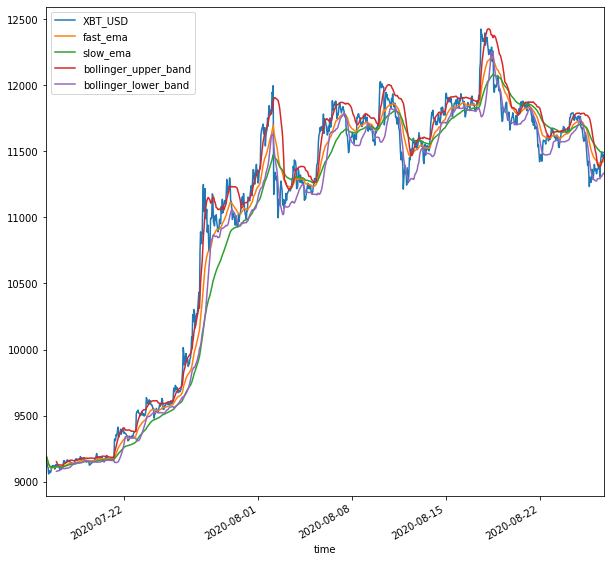

In [49]:
xbt_usd_timeseries[['XBT_USD', 'fast_ema', 'slow_ema', 'bollinger_upper_band', 'bollinger_lower_band']].plot(figsize=[10,10])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024ED6F1F248>,
      dtype=object)

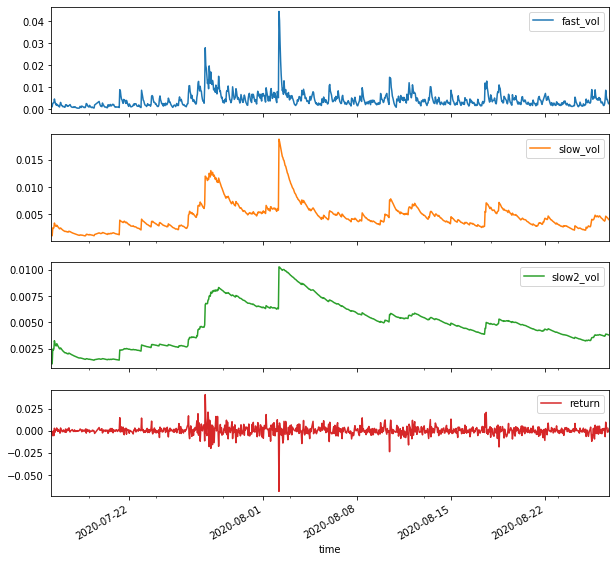

In [47]:
xbt_usd_timeseries[['fast_vol', 'slow_vol', 'slow2_vol','return']].plot(figsize=[10,10], subplots=True)

## Build Random Forest Model
    1. Set x variable to list of Feature
---

In [56]:
 # Set x variable list of features
x_var_list = ['crossover_signal', 'vol_signal', 'bollinger_signal']

# Filter by x-variable list
trading_signals_df = xbt_usd_timeseries
# Shift Dataframe Index by 1
trading_signals_df[x_var_list] = trading_signals_df[x_var_list].shift(1)
# Drop NAs and Replace Infs
trading_signals_df.dropna(subset=x_var_list, inplace=True)
trading_signals_df.dropna(subset=['return'], inplace=True)
trading_signals_df = trading_signals_df.replace([np.inf, -np.inf], np.nan)

# Construct the Dependent Vairable where if return is greater than 0, then 1, else, 0.
    # Changing the target variable away from 0 introduces the problem of an imbalanced dataset
trading_signals_df['Positive Return'] = np.where(trading_signals_df['return'] > 0, 1.0, 0.0)


C:\Users\GrantDePalma\Anaconda3_new\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\GrantDePalma\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\GrantDePalma\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remov

In [65]:
trading_signals_df.tail()

,XBT_USD,fast_ema,slow_ema,crossover_long,crossover_short,crossover_signal,return,fast_vol,slow_vol,vol_trend_long,...,vol_signal,slow2_vol,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
time,,,,,,,,,,,,,,,,,,,,,
2020-08-26 15:00:00+00:00,11490.0,11411.446170,11493.545057,0.0,-1.0,-1.0,0.003616,0.004294,0.004464,1.0,...,-1.0,0.003880,11362.140,53.528078,11415.668078,11308.611922,0.0,-1.0,-1.0,1.0
2020-08-26 16:00:00+00:00,11471.1,11415.868028,11492.816305,0.0,-1.0,-1.0,-0.001645,0.004300,0.004345,1.0,...,-1.0,0.003857,11372.480,53.607321,11426.087321,11318.872679,0.0,-1.0,-1.0,0.0
2020-08-26 17:00:00+00:00,11459.8,11419.124498,11491.744325,0.0,-1.0,-1.0,-0.000985,0.003240,0.004210,1.0,...,1.0,0.003832,11380.155,54.612525,11434.767525,11325.542475,0.0,-1.0,-1.0,0.0
2020-08-26 18:00:00+00:00,11447.4,11421.220428,11490.304543,0.0,-1.0,-1.0,-0.001082,0.002373,0.004080,1.0,...,1.0,0.003807,11384.405,56.435072,11440.840072,11327.969928,0.0,-1.0,-1.0,0.0
2020-08-26 19:00:00+00:00,11475.0,11425.206854,11489.807632,0.0,-1.0,-1.0,0.002411,0.002483,0.003983,1.0,...,1.0,0.003793,11391.655,58.359020,11450.014020,11333.295980,0.0,-1.0,-1.0,1.0


In [67]:
## Assign Training and Testing Windows
training_start = '2020-07-16 06:00:00+00:00'
training_end = '2020-08-15 06:00:00+00:00'
testing_start = '2020-08-15 07:00:00+00:00'
testing_end = '2020-08-26 19:00:00+00:00'

# Separate X and y Training Datasets
X_train = trading_signals_df[x_var_list][training_start:training_end]
y_train = trading_signals_df['Positive Return'][training_start:training_end]

# Separate X and y Testing Data Sets
X_test = trading_signals_df[x_var_list][testing_start:testing_end]
y_test = trading_signals_df['Positive Return'][testing_start:testing_end]

X_test.tail()

,crossover_signal,vol_signal,bollinger_signal
time,,,
2020-08-26 15:00:00+00:00,-1.0,-1.0,-1.0
2020-08-26 16:00:00+00:00,-1.0,-1.0,-1.0
2020-08-26 17:00:00+00:00,-1.0,1.0,-1.0
2020-08-26 18:00:00+00:00,-1.0,1.0,-1.0
2020-08-26 19:00:00+00:00,-1.0,1.0,-1.0


In [69]:
from sklearn.ensemble import RandomForestClassifier

ImportError: cannot import name '__version__' from 'sklearn' (unknown location)

## LSTM Prediction
1. Clean Data
2. Create Features(X) and Target(y)
3. Split Data between Training and Testing Sets
4. Scale Data with MinMaxScalar
5. Reshape Features Data for the LSTM Model
6. Build and Train LSTM RNN
7. Evaluate the Model
8. Make Predictions
---

## Websocket Scripts for Shrimpy
---

In [2]:
import shrimpy
from dotenv import load_dotenv
from pathlib import Path
import os
import plotly.graph_objects as go
import pandas as pd

In [10]:
# Set environment variables from the .env file
env_path = Path("/Users/GrantDePalma")/'.env'
load_dotenv(env_path)

shrimpy_public_key = os.getenv("SHRIMPY_PUBLIC_KEY")
shrimpy_private_key = os.getenv("SHRIMPY_PRIVATE_KEY")

shrimpy_client = shrimpy.ShrimpyApiClient(shrimpy_public_key, shrimpy_private_key)

## 1. Websocket Data
### 1.a Websocket Price Ticker

In [6]:
# Websocket Price Ticker

# This is a sample handler, it simply prints the incoming message to the console
def error_handler(err):
    print(err)

# This is a sample handler, it simply prints the incoming message to the console
def handler(msg):
    print(msg['content'][0]['price'])
    
# Create the websocket client using the raw token retrieved by the REST API
api_client = shrimpy.ShrimpyApiClient(shrimpy_public_key, shrimpy_private_key)
raw_token = api_client.get_token()
raw_token = api_client.get_token()
client = shrimpy.ShrimpyWsClient(error_handler, raw_token['token'])

# The subscription data for the websocket
subscribe_data = {
    "type": "subscribe",
    "exchange": "coinbasepro",
    "pair": "eth-btc",
    "channel": "trade"
}

# Start processing the Shrimpy websocket stream!
client.connect()
client.subscribe(subscribe_data, handler)

# Once complete, stop the client
client.disconnect()

{'token': '12c4909931edf16614e5c30c678a8f2fc40dafb2c0dd09a41aa1cdf798867022761971c039aaba33c985c186363e37b2e4ea16f5c91f2e24a07f070c6ae1ad51'}

### 1.b Websocket Live Order Book

In [ ]:
# This is a sample handler, it simply prints the incoming message to the console
def error_handler(err):
    print(err)

# This is a sample handler, it simply prints the incoming message to the console
def handler(msg):
    print(msg)

# Create the websocket client by getting the raw token.
api_client = shrimpy.ShrimpyApiClient(shrimpy_public_key, shrimpy_secret_key)
raw_token = api_client.get_token()
ws_client = shrimpy.ShrimpyWsClient(error_handler, raw_token['token'])

subscribe_data = {
    "type": "subscribe",
    "exchange": "coinbasepro",
    "pair": "eth-btc",
    "channel": "orderbook"
}

# Start processing the Shrimpy websocket stream!
ws_client.connect()
ws_client.subscribe(subscribe_data, handler)

# Once complete, stop the client
ws_client.disconnect()

### 1.c Available Historical Data

In [3]:
# collect the historical candlestick data
client = shrimpy.ShrimpyApiClient(shrimpy_public_key, shrimpy_private_key)

instruments = client.get_historical_instruments('coinbasepro')
instruments

[{'exchange': 'coinbasepro',
  'baseTradingSymbol': 'ATOM',
  'quoteTradingSymbol': 'BTC',
  'tradeStartTime': '2020-01-14T18:00:00.000Z',
  'tradeEndTime': '2020-08-26T19:00:00.000Z',
  'orderBookEndTime': '2020-08-26T19:00:00.000Z',
  'orderBookStartTime': '2020-01-14T18:00:00.000Z'},
 {'exchange': 'coinbasepro',
  'baseTradingSymbol': 'BAND',
  'quoteTradingSymbol': 'BTC',
  'tradeStartTime': '2020-08-11T16:00:00.000Z',
  'tradeEndTime': '2020-08-26T19:00:00.000Z',
  'orderBookEndTime': '2020-08-26T19:00:00.000Z',
  'orderBookStartTime': '2020-08-11T16:00:00.000Z'},
 {'exchange': 'coinbasepro',
  'baseTradingSymbol': 'BCH',
  'quoteTradingSymbol': 'BTC',
  'tradeStartTime': '2018-01-23T11:00:00.000Z',
  'tradeEndTime': '2020-08-26T19:00:00.000Z',
  'orderBookEndTime': '2020-08-26T19:00:00.000Z',
  'orderBookStartTime': '2018-01-23T11:00:00.000Z'},
 {'exchange': 'coinbasepro',
  'baseTradingSymbol': 'COMP',
  'quoteTradingSymbol': 'BTC',
  'tradeStartTime': '2020-06-23T16:00:00.000Z'

### 1.d Historical Candlesticks

In [8]:
candles = client.get_historical_candles(
    'coinbasepro',              # exchange
    'ETH',                      # base_trading_symbol
    'BTC',                      # quote_trading_symbol
    '2017-02-11T00:00:00.000Z', # start_time
    '2019-10-20T00:00:00.000Z', # end_time
    1000,                       # num_candles
    '1d'                        # interval
)

dates = []
open_data = []
high_data = []
low_data = []
close_data = []

for candle in candles:
    dates.append(candle['time'])
    open_data.append(candle['open'])
    high_data.append(candle['high'])
    low_data.append(candle['low'])
    close_data.append(candle['close'])

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])

fig.show()

TypeError: string indices must be integers

### 1.e Historical Trades


In [9]:
trades = client.get_historical_trades(
    'coinbasepro',
    'ETH',
    'BTC',
    '2019-05-19T00:00:00.000Z',
    '2019-05-20T00:00:00.000Z',
    100
)
trades

{'error': 'Not enough credits. Please purchase or upgrade your data plan.'}

### 1.f Historical Order Book Snapshots

In [ ]:

orderbooks = client.get_historical_orderbooks(
    'coinbasepro',
    'ETH',
    'BTC',
    '2019-05-19T00:00:00.000Z',
    '2019-05-20T00:00:00.000Z',
    100
)

## 2. Websocket Arbitrage Scripts

In [ ]:
# a sample error handler, it simply prints the incoming error
def error_handler(err):
    print(err)

exchanges_bbo = {}

# define the handler to manage the output stream
def handler(msg):
    bid_price = msg['content']['bids'][0]['price']
    ask_price = msg['content']['asks'][0]['price']
    exchanges_bbo[msg['exchange']] = {'bid': float(bid_price), 'ask': float(ask_price)}
    best_bid = 0.0
    best_ask = 100000.0
    best_bid_exchange = ''
    best_ask_exchange = ''
    for key, value in exchanges_bbo.items():
        if value['bid'] > best_bid:
            best_bid = value['bid']
            best_bid_exchange = key
        if value['ask'] < best_ask:
            best_ask = value['ask']
            best_ask_exchange = key
    if best_bid > best_ask:
        print("sell on " + best_bid_exchange + " for " + str(best_bid))
        print("buy on " + best_ask_exchange + " for " + str(best_ask))
    else:
        print("No Arbitrage Available")


# create the Shrimpy websocket client
api_client = shrimpy.ShrimpyApiClient(shrimpy_public_key, shrimpy_private_key)
raw_token = api_client.get_token()
client = shrimpy.ShrimpyWsClient(error_handler, raw_token['token'])

# connect to the Shrimpy websocket and subscribe
client.connect()

# select exchanges to arbitrage
exchanges = ["bittrex", "binance", "kucoin"]
pair = "btc-usdt"

# subscribe to the websockets for the given pair on each exchange
for exchange in exchanges:
    subscribe_data = {
        "type": "subscribe",
        "exchange": exchange,
        "pair": pair,
        "channel": "bbo"
    }
    client.subscribe(subscribe_data, handler)
client.disconnect()

## Portfolio Management Shrimpy

In [22]:
# import required libraries
import shrimpy
# Set environment variables from the .env file
env_path = Path("/Users/GrantDePalma")/'.env'
load_dotenv(env_path)
# Extract API Keys from environment variables
shrimpy_public_key = os.getenv("SHRIMPY_PUBLIC_KEY")
shrimpy_private_key = os.getenv("SHRIMPY_PRIVATE_KEY")
KRAKEN_API_KEY = os.getenv("KRAKEN_API_KEY")
KRAKEN_PRIVATE_KEY = os.getenv("KRAKEN_PRIVATE_KEY")
KUCOIN_API_KEY = os.getenv("KUCOIN_API_KEY")
KUCOIN_PRIVATE_KEY = os.getenv("KUCOIN_SECRET_KEY")
COINBASE_API_KEY = os.getenv("COINBASE_PRO_API_KEY")
COINBASE_PRIVATE_KEY = os.getenv("COINBASE_PRO_SECRET_KEY")
COINBASE_PASSPHRASE = os.getenv("COINBASE_PRO_PASSPHRASE")

# create the Shrimpy client
client = shrimpy.ShrimpyApiClient(shrimpy_public_key, shrimpy_private_key)

# Set User ID
users = client.list_users()
user_id = users[0]['id'] # first id in list of users

# link our first exchange so we can access balance data
exchange_name = 'coinbasepro'
exchange_public_key = COINBASE_API_KEY
exchange_secret_key = COINBASE_PRIVATE_KEY
exchange_passphrase = COINBASE_PASSPHRASE
link_account_response = client.link_account(
    user_id,
    exchange_name,
    exchange_public_key,
    exchange_secret_key,
    exchange_passphrase
)

account_id = link_account_response['id']

# get the list of assets available on the exchange
exchange_assets = client.get_exchange_assets(exchange_name)

# select assets to put in your portfolio
portfolio = []

# add the first 5 assets returned for the exchange to our portfolio
# warning: insert your own portfolio construction logic here before running
for i in range(0,5):
    portfolio.append({'symbol': exchange_assets[i]['tradingSymbol'], 'percent': '20'})
    print("Allocating 20% " + exchange_assets[i]['tradingSymbol'])




Allocating 20% USD
Allocating 20% BTC
Allocating 20% BCH
Allocating 20% EUR
Allocating 20% GBP


In [ ]:
# allocate the portfolio
client.allocate(
    user_id,
    account_id,
    {
        'isDynamic': False,
        'allocations': portfolio
    }
)

### 3. Real Time Dashboard

In [23]:
# import required libraries
import shrimpy
import time

account_id = link_account_response['id']

# wait while Shrimpy collects data for the exchange account
# only required the first time linking
time.sleep(5)

# collect asset balances on the exchange
balance = client.get_balance(user_id, account_id)
holdings = balance['balances']

total = 0

# calculate and print balances for each asset. 
for asset in holdings:
    print(asset['symbol'] + ' $' + str(round(asset['usdValue'], 2)))
    total += asset['usdValue']

print("Total" + ' $' + str(round(total, 2)))

BTC $0.0
USD $0.01
Total $0.01


In [16]:
balance

{'retrievedAt': '2020-08-26T22:40:08.000Z',
 'balances': [{'symbol': 'BTC',
   'nativeValue': 4.1495918e-09,
   'btcValue': 4.1495918e-09,
   'usdValue': 4.75581189044879e-05},
  {'symbol': 'USD',
   'nativeValue': 0.0050932767671,
   'btcValue': 4.44404025952637e-07,
   'usdValue': 0.0050932767671}]}

In [36]:
# Price TIcker

client = shrimpy.ShrimpyWsClient()
def handler(msg):
    ticker = msg['content'][0]['price']
    print(ticker)

subscribe_data = {
    "type": "subscribe", 
    "exchange": "binance",
    "pair": "btc-usdt",
    "channel": "trade"
}
client.connect()
client.subscribe(subscribe_data, handler)

In [ ]:
def on_init():
    
    
def 



In [ ]:
def trading_algorithm(): 
    # Set environment variables from the .env file
    env_path = Path("/Users/GrantDePalma")/'.env'
    load_dotenv(env_path)
    # Extract API Keys from environment variables
    shrimpy_public_key = os.getenv("SHRIMPY_PUBLIC_KEY")
    shrimpy_private_key = os.getenv("SHRIMPY_PRIVATE_KEY")
    KRAKEN_API_KEY = os.getenv("KRAKEN_API_KEY")
    KRAKEN_PRIVATE_KEY = os.getenv("KRAKEN_PRIVATE_KEY")

    # Create User ID
    users = client.list_users()
    user_id = users[0]['id']

    # Exchange Data
    exchange_name = 'kraken'
    exchange_public_key = KRAKEN_API_KEY
    exchange_secret_key = KRAKEN_SECRET_KEY
    # Link kraken exchange 
    link_account_response = client.link_account(user_id,
                                               exchange_name,
                                               exchange_public_key,
                                               exchange_secret_key)
    account_id = link_account_response['id']

    #balances
    balance = client.get_balance(user_id, account_id)
    total_balance_history = client.get_total_balance_history(user_id, account_id)
    
    btc_wts = []
    usd_wts = [0,.25,.5]
    alt_wts = [0,.25,.5]
    
    very_bullish = # if btc price prediction is greater than 
    bullish =  # if btc
    nuetral =  # if btc is predicting 0 returns
    bearish =  # if btc is predicting negative returns
    very_bearish = # if btci predicting very negative returns
    
    if very_bullish: #>5%
        btc_wt = .5
        usd_wt = 0
        alt_wt = .5
        
    elif bullish: #0->5%
        btc_wt = .4
        usd_wt = .2
        alt_wt = .4
        
    elif nuetral: #-1% --> 0%
        btc_wt = .2
        usd_wt = .6
        alt_wt = .2
        
    elif bearish: # -5% ---> -1%
        btc_wt = .1
        usd_wt = .8
        alt_wt = .1
    
    elif very_bearish:  # < -5%
        btc_wt = 0 
        usd_wt = 1
        alt_wt = 0
    
         
    # Asset Management
    def strategy():
        if signal_df['ema_4h_cross']==1:
            wts_main = [0,.5, .5]
            alt_wts = [.5,.5] #
            if signal_df['ema_1hr_cross']==1:
                alt_wts_1 = [0,1]
                alt_wts_2 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
                #alt_wts_3 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
                
                wt_btc = wts_main[1] + alt_wts_1[1]*alt_wts[0] 
                wt_usd = wts_main[0] + alt_wts_1[0]*alt_wts[0]
                #alt_wts_2_ = alt_wts[1]*alt_wts_2
                #alt_wts_3_ = alt_wts[2]*alt_wts_3
                #alt_symbols = signal_df['acceleration_rank_15m'].iloc[:10]
                shrimpy_client.set_strategy(usder_id, account_id, {
                    "insDynamic":false,
                    "allocations": [
                        {"symbol": "XBT", "percent": wts_main[1]*alt_wts_1[1]},
                        {"symbol": "USD", "percent": alt_wts[0]},
                       #{"symbol": alt_symbol[0], "percent": alt_wts_2[0]},
                       #{"symbol": alt_symbol[1], "percent": alt_wts_2[1]},
                       #{"symbol": alt_symbol[2], "percent": alt_wts_3}[2],
                       #{"symbol": alt_symbol[3], "percent": alt_wts_4}[3],
                       #{"symbol": alt_symbol[4], "percent": alt_wts_5}[4],
                       #{"symbol": alt_symbol[5], "percent": alt_wts_6}[5],
                       #{"symbol": alt_symbol[6], "percent": alt_wts_7}[6],
                       #{"symbol": alt_symbol[7], "percent": alt_wts_8}[7],
                       #{"symbol": alt_symbol[8], "percent": alt_wts_9}[8],
                       #{"symbol": alt_symbol[9], "percent": alt_wts_10[9]},
                    ]
            })
            if signal_df['ema_1hr_cross']==0:
                alt_wts_1 = [.5,.5]
                alt_wts_2 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
                alt_wts_3 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
                
        if signal_df['ema_4hr_cross']==0:
            wts_main = [.5,.25,.25]
            alt_wts = [.5,.25,.25]
            if signal_df['ema_1hr_cross']==1:
                alt_wts_1 = [0,1]
                alt_wts_2 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
                alt_wts_3 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
            if signal_df['ema_1hr_cross']==0:
                alt_wts_1 = [.5,.5]
                alt_wts_2 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
                alt_wts_3 = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]            
                
                
        shrimpy_client.set_rebalance_period(user_id, account_id, 1) # set rebalance every 1 hour
        shrimpy_client.set_strategy(user_id, account_id, {
            "isDynamic":false,
            "allocations": [
                {"symbol": "XBT", "percent":btc_wt},
                {"symbol": "USD", "percent":usd_wt},
                {"symbol": alt_1, "percent": alt_wt_1},
                {"symbol": alt_2, "percent": alt_wt_2},
                {"symbol": alt_3, "percent": alt_wt_3},
                {"symbol": alt_4, "percent": alt_wt_4},
                {"symbol": alt_5, "percent": alt_wt_5},
                {"symbol": alt_6, "percent": alt_wt_6},
                {"symbol": alt_7, "percent": alt_wt_7},
                {"symbol": alt_8, "percent": alt_wt_8},
                {"symbol": alt_9, "percent": alt_wt_9},
                {"symbol": alt_10, "percent": alt_wt_10},
            ]
        })
        shrimpy_client.rebalance(user_id, account_id) # Rebalance, put in rebal
    
    
    # sell every asset besides the consolidation asset
    for asset in holdings:
        asset_symbol = asset['symbol']
        asset_amount = asset['nativeValue']
        if asset_symbol != consolidation_symbol:
            print('Selling ' + str(asset_amount) + ' of ' + asset_symbol)
            create_trade_response = client.create_trade(
                user_id,
                account_id,
                asset_symbol,
                consolidation_symbol,
                asset_amount
            )
            
    
            
            

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 21 20:29:49 2020

@author: GrantDePalma
"""

#-------- Data Prep -------
# Shrimpy websocket connections 
#    Balance Stream
#    Trade Stream
#    Account Stream
#    Market Data Stream





#---------- Calculate ----------------



#------- PRINT -----------

# Account Balances

# Asset Balances

# Trade History

# Strategy Stats
strategy_stats = {{"strategy": "waverider", {"rmse"}: rmse_wr, "expected_return": expected_return_wr},
                  {"strategy": ""}



# Global Ratios 
wtd_pnl = 
cumulative_growth_factor = 
cwgr = 
cwgr_gr = 
cmgr = 
cmgr_gr = 

# Correlation Ratios

# Risk-Return Ratios
sortino_ratio = 
sharpe_ratio = 

# Risk Ratios


# Return Ratios
alpha = 



# Deposits/Withdrawals